In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

def lattice_graph(N):
  size = int(math.sqrt(N))
  if (size**2 != N):
    size = size + 1
  lattice = []
  i = 1
  while(i <= N):
    row = []
    for _ in range(size):
      if (i > N):
        row.append(0)
      else:
        row.append(i)
        i += 1
    lattice.append(row)
  print(lattice)
  graph = []
  for i in range(len(lattice)):
    for j in range(size-1):
      if (lattice[i][j] != 0) and (lattice[i][j+1] != 0):
        graph.append([lattice[i][j], lattice[i][j+1]])
        graph.append([lattice[i][j+1], lattice[i][j]])
  for i in range(len(lattice)-1):
    for j in range(size):
      if (lattice[i][j] != 0) and (lattice[i+1][j] != 0):
        graph.append([lattice[i][j], lattice[i+1][j]])
        graph.append([lattice[i+1][j], lattice[i][j]])
  return graph

# LATTICE WRAPPED

def regular_lattice(N):
  size = int(math.sqrt(N))
  if (size**2 != N):
    size = size
  lattice = []
  i = 0
  while (i < N):
    row = []
    for _ in range(size):
      if (i > N):
        row.append(0)
      else:
        row.append(i)
        i += 1
    lattice.append(row)
  print(lattice)
  graph = []
  for i in range(size):
    for j in range(size):
      graph.append([lattice[i][j], lattice[i][(j+1)% size]])
      graph.append([lattice[i][(j+1)% size], lattice[i][j]])
      
  for i in range(size):
    for j in range(size):
      graph.append([lattice[i][j], lattice[(i+1)%size][j]])
      graph.append([lattice[(i+1)%size][j], lattice[i][j]])
  return graph

# LATTICE WITH HOUSEHOLDS

def square(node1, node2, node3, node4):
  graph = []
  graph.append([node1, node2])
  graph.append([node2, node1])
  graph.append([node2, node3])
  graph.append([node3, node2])
  graph.append([node3, node4])
  graph.append([node4, node3])
  graph.append([node4, node1])
  graph.append([node1, node4])
  return graph

def complete_square(nodes):
  graph = []
  for node1 in nodes:
    for node2 in nodes:
      if (node1 != node2):
        graph.append([node1, node2])
  return graph

def lattice_households(N):
  old_graph = regular_lattice(N)
  node_list = np.arange(N)
  square_dict = {}
  for node in node_list:
    square_dict[node] = [4*node, 4*node + 1, 4*node + 2, 4*node + 3]
  graph_dict = tuples_to_dict(old_graph, N)
  new_graph = []
  for node in node_list:
    square1_nodes = square_dict[node]
    square1 = complete_square([square1_nodes[0], square1_nodes[1], square1_nodes[2], square1_nodes[3]])
    for edge in square1:
        new_graph.append(edge)
  for node in node_list:
    i = 0
    square1_nodes = square_dict[node]
    for neighbor in graph_dict[node]:
      square2_nodes = square_dict[neighbor]
      new_graph.append([square1_nodes[0], square2_nodes[0]])
      new_graph.append([square2_nodes[0], square1_nodes[0]])
      square_dict[node].remove(square1_nodes[0])
      square_dict[neighbor].remove(square2_nodes[0])
      graph_dict[neighbor].remove(node)
      i += 1
  return new_graph

def infect_households(numInfectedMembers, numSquares, budget, initial_recovery_rate):
  recoveryRates = {}
  rho = budget/(numInfectedMembers*numSquares)
  for i in range(numSquares):
    members = [4*i, 4*i + 1, 4*i + 2, 4*i + 3]
    for member in range(4):
      if member < numInfectedMembers:
        recoveryRates[members[member]] = rho + initial_recovery_rate
      else:
        recoveryRates[members[member]] = initial_recovery_rate
  return recoveryRates

In [ ]:
def percolation(neighbors_per_node, transmissionRate, recoveryRates):
    new_graph = []
    for node in neighbors_per_node:
        # print(recoveryRates[node])
        recoveryTime = np.random.exponential(1/recoveryRates[node])
        for neighbor in neighbors_per_node[node]:
            transmissionTime = np.random.exponential(1/transmissionRate)
            if (transmissionTime <= recoveryTime):
                new_graph.append([node, neighbor])
    return new_graph
  
def tuples_to_dict(graph, N):
  graph_dict = {}
  for i in range(N):
    graph_dict[i] = []
  for edge in graph:
    graph_dict[edge[0]].append(edge[1])
  return graph_dict

def find_connected_nodes(node, graph_dict, connected_component):
  if node not in connected_component:
    connected_component.append(node)
  for neighbor in graph_dict[node]:
    if neighbor not in connected_component:
      find_connected_nodes(neighbor, graph_dict, connected_component)

def find_entire_connection(infected_nodes, neighbors_per_node):
  connected_nodes = []
  for node in infected_nodes:
    find_connected_nodes(node, neighbors_per_node, connected_nodes)
  return connected_nodes

def calculateFinalInfection(graph, source, numOfNodes, numOfTrials, transmissionRate, budget, neighbors_per_node, recoveryRates):
  num_infected = []
  for _ in range(numOfTrials):
    graph1 = percolation(neighbors_per_node, transmissionRate, recoveryRates)
    neighbors_per_node2 = tuples_to_dict(graph1, numOfNodes)
    infected_nodes = find_entire_connection(source, neighbors_per_node2)
    num_infected.append(len(infected_nodes))
  return np.mean(num_infected)

In [ ]:
def dfs(node, graph_dict, visited, stack):
  visited[node] = True
  for neighbor in graph_dict[node]:
    if visited[neighbor] == False:
      dfs(neighbor, graph_dict, visited, stack)
  stack.append(node)

def dfs2(node, graph_dict, visited, scc):
  visited[node] = True
  # print (node)
  scc.append(node)
  for neighbor in graph_dict[node]:
    if visited[neighbor] == False:
      dfs2(neighbor, graph_dict, visited, scc) # or dfs?

def get_transpose(graph):
  trans = []
  for edge in graph:
    trans.append([edge[1], edge[0]])
  # print (trans)
  return trans


def find_sccs(graph, N):
  stack = []
  sccs = []
  graph_dict = tuples_to_dict(graph, N)
  visited =[False]*N

  for i in range(N):
    if visited[i] == False:
      dfs(i, graph_dict, visited, stack)
  
  # print (stack)
  trans = get_transpose(graph)
  trans_dict = tuples_to_dict(trans, N)
  visited =[False]*N
  

  while stack:
    i = stack.pop()
    # print (i)
    if visited[i]==False:
      scc = []
      dfs2(i, trans_dict, visited, scc)
      # print (scc)
      sccs.append(scc)
      # print ("")
  return sccs

def isConnected(node1, node2, graph_dict, visited):
  # if node1 == node2:
  #   # print ("yes")
  #   return True
  
  # visited[node1] = True
  # for neighbor in graph_dict[node1]:
  #   if visited[neighbor] == False:
  #     if isConnected(neighbor, node2, graph_dict, visited) == False:
  #       return False
  #     else:
  #       return True

  stack = []
  stack.append(node1)
  visited[node1] = True

  while stack:
    node = stack.pop()
    for neighbor in graph_dict[node]:
      # print (neighbor)
      if neighbor == node2:
        return True

      if visited[neighbor] == False:
        stack.append(neighbor)
        visited[neighbor] = True
  return False

def generate_bowtie(graph, N):
  sccs = find_sccs(graph, N)
  node_list = [i for i in range(N)]
  sizes = []
  # print (sccs)
  for scc in sccs:
    sizes.append(len(scc))
  ind = np.argmax(sizes)
  max_scc = sccs[ind]
  graph_dict = tuples_to_dict(graph, N)
  scc_out = []
  for node in max_scc:
    node_list.remove(node)
    connected_component = []
    find_connected_nodes(node, graph_dict, connected_component)
    for i in connected_component:
      if i not in max_scc and i not in scc_out:
        scc_out.append(i)
        node_list.remove(i)
  scc_in = []
  # print (node_list)
  for node in node_list:
    visited = [False]*N
    if isConnected(node, max_scc[0], graph_dict, visited):
      scc_in.append(node)
      # print (scc_in)
  
  return scc_in, max_scc, scc_out
      
def erdos_renyi_graph(N, M):
  graph = []
  node_list = [i for i in range(N)]
  numEdges = 0
  while numEdges < M:
    edge = random.sample(node_list, 2)
    if edge not in graph:
      numEdges += 1
      graph.append(edge)
  # print (graph)
  return graph

print (generate_bowtie([[1, 0], [0,2], [2,1], [0, 3], [3, 4], [5, 2]], 6))


# print (generate_bowtie(erdos_renyi_graph(10, 10), 10))




([5], [0, 1, 2], [3, 4])


[[0, 1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14, 15], [16, 17, 18, 19, 20, 21, 22, 23], [24, 25, 26, 27, 28, 29, 30, 31], [32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47], [48, 49, 50, 51, 52, 53, 54, 55], [56, 57, 58, 59, 60, 61, 62, 63]]
0
0.0
0.0
0.0
50
1.3
0.0
0.0
100
1.0
7.6
10.3
150
0.6
4.9
8.7
200
1.0
4.7
18.3
250
1.1
6.8
22.2


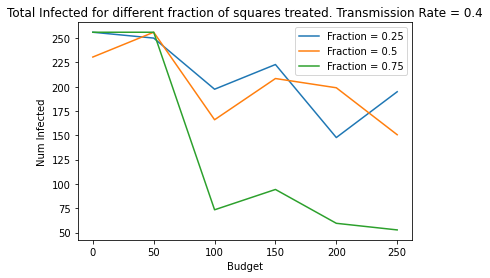

In [ ]:
 ### FRACTIONS OF SQUARES
def calculateFinalInfection2(fraction, graph, source, numOfNodes, numOfTrials, transmissionRate, budget, neighbors_per_node, initial_recovery_rate):
  num_infected = []
  sizes = []
  for _ in range(numOfTrials):
    recoveryRates = fractions_squares(fraction, initial_recovery_rate, int(numOfNodes/4), budget)
    graph1 = percolation(neighbors_per_node, transmissionRate, recoveryRates)
    neighbors_per_node2 = tuples_to_dict(graph1, numOfNodes)
    # s.append(0)
    # comp_sizes = findComponentSizes(neighbors_per_node2, numOfNodes)
    bowtie = generate_bowtie(graph1, numOfNodes)
    # print (bowtie)
    # comp_sizes.sort()
    # if len(comp_sizes) >= 2:
    #   sizes.append(comp_sizes[-2])
    # else:
    #   sizes.append(0)
    sizes.append(len(bowtie[0]))
    infected_nodes = find_entire_connection(source, neighbors_per_node2)
    num_infected.append(len(infected_nodes))
  print (np.mean(sizes))
  return np.mean(num_infected)


def findComponentSizes(graph_dict, n):
  node_list = [i for i in range(n)]
  component_sizes = []
  while node_list != []:
    node = np.random.choice(node_list)
    connected_nodes = []
    find_connected_nodes(node, graph_dict, connected_nodes)
    # print (graph_dict)
    # print (connected_nodes)
    for i in connected_nodes:
      if i in node_list:
        node_list.remove(i)
    # print ("node list: " + str(node_list))
    component_sizes.append(len(connected_nodes))
  return component_sizes

 def fractions_squares(fraction, initial_recovery_rate, N, budget):
  recoveryRates = {}
  number = round(fraction * N)
  squares = np.random.choice(np.arange(N), number)
  recoveryRate = round(budget/(4*number))
  # print (recoveryRate)
  for i in range(N):
    recoveryRates[4*i] = initial_recovery_rate
    recoveryRates[4*i + 1] = initial_recovery_rate
    recoveryRates[4*i + 2] = initial_recovery_rate
    recoveryRates[4*i + 3] = initial_recovery_rate
    if i in squares:
      recoveryRates[4*i] += recoveryRate
      recoveryRates[4*i + 1] += recoveryRate
      recoveryRates[4*i + 2] += recoveryRate
      recoveryRates[4*i + 3] += recoveryRate
  return recoveryRates

def fractions(fraction, initial_recovery_rate, N, budget):
  recoveryRates = {}
  number = round(fraction * N)
  nodes = np.random.choice(np.arange(N), number)
  recoveryRate = round(budget/number)
  for i in range(N):
    recoveryRates[i] = initial_recovery_rate
    if i in nodes:
      recoveryRates[i] += recoveryRate
  return recoveryRates

def alternate_antidotes(initial_recovery_rate, N, budget):
  recoveryRates = {}
  number = round(0.5 * N)
  recoveryRate = round(budget/(4*number))
  for i in range(N):
    recoveryRates[4*i] = initial_recovery_rate
    recoveryRates[4*i + 1] = initial_recovery_rate
    recoveryRates[4*i + 2] = initial_recovery_rate
    recoveryRates[4*i + 3] = initial_recovery_rate
    if (i % 2 == 0):
      recoveryRates[4*i] += recoveryRate
      recoveryRates[4*i + 1] += recoveryRate
      recoveryRates[4*i + 2] += recoveryRate
      recoveryRates[4*i + 3] += recoveryRate
  return recoveryRates
    
def boundary(initial_recovery_rate, N, budget):
  edge_length = math.sqrt(N)
  recoveryRates = {}
  number = edge_length
  recoveryRate = round(budget/(4*number))
  for i in range(N):
    recoveryRates[4*i] = initial_recovery_rate
    recoveryRates[4*i + 1] = initial_recovery_rate
    recoveryRates[4*i + 2] = initial_recovery_rate
    recoveryRates[4*i + 3] = initial_recovery_rate
    if (i % (edge_length/2) == 0 and i % edge_length != 0):
      # print (i)
      recoveryRates[4*i] += recoveryRate
      recoveryRates[4*i + 1] += recoveryRate
      recoveryRates[4*i + 2] += recoveryRate
      recoveryRates[4*i + 3] += recoveryRate
  return recoveryRates

def diagonal(initial_recovery_rate, N, budget):
  recoveryRates = {}
  edge_length = math.sqrt(N)
  number = edge_length
  recoveryRate = round(budget/(4*number))
  for i in range(N):
    recoveryRates[4*i] = initial_recovery_rate
    recoveryRates[4*i + 1] = initial_recovery_rate
    recoveryRates[4*i + 2] = initial_recovery_rate
    recoveryRates[4*i + 3] = initial_recovery_rate
    if (i % (edge_length + 1) == 0):
      # print (i)
      recoveryRates[4*i] += recoveryRate
      recoveryRates[4*i + 1] += recoveryRate
      recoveryRates[4*i + 2] += recoveryRate
      recoveryRates[4*i + 3] += recoveryRate
  return recoveryRates

def calculateFinalInfection3(fraction, graph, source, numOfNodes, numOfTrials, transmissionRate, budget, neighbors_per_node, initial_recovery_rate):
  num_infected = []
  sizes = []
  for _ in range(numOfTrials):
    recoveryRates = fractions(fraction, initial_recovery_rate, numOfNodes, budget)
    graph1 = percolation(neighbors_per_node, transmissionRate, recoveryRates)
    neighbors_per_node2 = tuples_to_dict(graph1, numOfNodes)
    comp_sizes = findComponentSizes(neighbors_per_node2, numOfNodes)
    comp_sizes.sort()
    if len(comp_sizes) > 2:
      sizes.append(comp_sizes[-2])
    else:
      sizes.append(0)
    infected_nodes = find_entire_connection(source, neighbors_per_node2)
    num_infected.append(len(infected_nodes))
  print (np.mean(sizes))
  return np.mean(num_infected)

def calculateFinalInfection4(graph, source, numOfNodes, numOfTrials, transmissionRate, budget, neighbors_per_node, initial_recovery_rate):
  num_infected = []
  sizes = []
  for _ in range(numOfTrials):
    recoveryRates = alternate_antidotes(initial_recovery_rate, int(numOfNodes/4), budget)
    graph1 = percolation(neighbors_per_node, transmissionRate, recoveryRates)
    neighbors_per_node2 = tuples_to_dict(graph1, numOfNodes)
    comp_sizes = findComponentSizes(neighbors_per_node2, numOfNodes)
    comp_sizes.sort()
    if len(comp_sizes) > 2:
      sizes.append(comp_sizes[-2])
    else:
      sizes.append(0)
    infected_nodes = find_entire_connection(source, neighbors_per_node2)
    num_infected.append(len(infected_nodes))
  print (np.mean(sizes))
  return np.mean(num_infected)

def calculateFinalInfection_vert(graph, source, numOfNodes, numOfTrials, transmissionRate, budget, neighbors_per_node, initial_recovery_rate):
  num_infected = []
  sizes = []
  for _ in range(numOfTrials):
    recoveryRates = boundary(initial_recovery_rate, int(numOfNodes/4), budget)
    graph1 = percolation(neighbors_per_node, transmissionRate, recoveryRates)
    neighbors_per_node2 = tuples_to_dict(graph1, numOfNodes)
    comp_sizes = findComponentSizes(neighbors_per_node2, numOfNodes)
    comp_sizes.sort()
    if len(comp_sizes) > 2:
      sizes.append(comp_sizes[-2])
    else:
      sizes.append(0)
    infected_nodes = find_entire_connection(source, neighbors_per_node2)
    num_infected.append(len(infected_nodes))
  print (np.mean(sizes))
  return np.mean(num_infected)

def calculateFinalInfection_diag(graph, source, numOfNodes, numOfTrials, transmissionRate, budget, neighbors_per_node, initial_recovery_rate):
  num_infected = []
  sizes = []
  for _ in range(numOfTrials):
    recoveryRates = diagonal(initial_recovery_rate, int(numOfNodes/4), budget)
    graph1 = percolation(neighbors_per_node, transmissionRate, recoveryRates)
    neighbors_per_node2 = tuples_to_dict(graph1, numOfNodes)
    comp_sizes = findComponentSizes(neighbors_per_node2, numOfNodes)
    comp_sizes.sort()
    if len(comp_sizes) > 2:
      sizes.append(comp_sizes[-2])
    else:
      sizes.append(0)
    infected_nodes = find_entire_connection(source, neighbors_per_node2)
    num_infected.append(len(infected_nodes))
  print (np.mean(sizes))
  return np.mean(num_infected)

beta = 0.4
numSquares = 64
initial_recovery_rate = 0.01
budgets = np.arange(0,300, 50)
numOfTrials = 10
Y1 = []
Y2 = []
Y3 = []

#### FRACTION OF LATTICE WITH SQUARES
source = random.sample([i for i in range(0, numSquares*4)], 1)
graph = lattice_households(numSquares)
neighbors_per_node = tuples_to_dict(graph, numSquares*4)

for budget in budgets:
  print (budget)
  
  Y1.append(calculateFinalInfection2(0.25, graph, source, numSquares*4, numOfTrials, beta, budget, neighbors_per_node, initial_recovery_rate))
  # Y2.append(calculateFinalInfection5(graph, source, numSquares*4, numOfTrials, beta, budget, neighbors_per_node, initial_recovery_rate))
  Y2.append(calculateFinalInfection2(0.50, graph, source, numSquares*4, numOfTrials, beta, budget, neighbors_per_node, initial_recovery_rate))

  Y3.append(calculateFinalInfection2(0.75, graph, source, numSquares*4, numOfTrials, beta, budget, neighbors_per_node, initial_recovery_rate))

plt.plot(budgets, Y1, label="Fraction = 0.25")
plt.plot(budgets, Y2, label="Fraction = 0.5")
plt.plot(budgets, Y3, label="Fraction = 0.75")

plt.xlabel("Budget")
plt.ylabel("Num Infected")
plt.title("Total Infected for different fraction of squares treated. Transmission Rate = " + str(beta))
plt.legend()


#### FRACTIONS OF LATTICE
# graph = regular_lattice(numSquares)
# source = random.sample([i for i in range(0, numSquares)], 1)
# neighbors_per_node = tuples_to_dict(graph, numSquares)

# for budget in budgets:
#   print (budget)
#   Y1.append(calculateFinalInfection3(0.25, graph, source, numSquares, numOfTrials, beta, budget, neighbors_per_node, initial_recovery_rate))

#   Y2.append(calculateFinalInfection3(0.5, graph, source, numSquares, numOfTrials, beta, budget, neighbors_per_node, initial_recovery_rate))

#   Y3.append(calculateFinalInfection3(0.75, graph, source, numSquares, numOfTrials, beta, budget, neighbors_per_node, initial_recovery_rate))

# plt.plot(budgets, Y1, label="Fraction = 0.25")
# plt.plot(budgets, Y2, label="Fraction = 0.50")
# plt.plot(budgets, Y3, label="Fraction = 0.75")

# plt.xlabel("Budget")
# plt.ylabel("Num Infected")
# plt.title("Total Infected for different fraction of lattice nodes treated. Transmission Rate = " + str(beta))
# plt.legend()


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


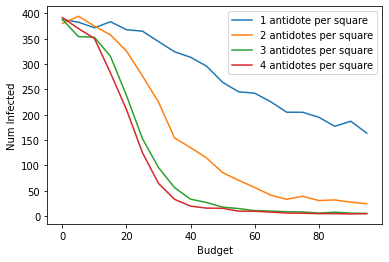

In [ ]:
beta = 0.1
numSquares = 100
initial_recovery_rate = 0.01
budgets = np.arange(0, 100, 5)
numOfTrials = 100
Y1 = []
Y2 = []
Y3 = []
Y4 = []

source = random.sample([i for i in range(0, numSquares*4)], 1)
graph = lattice_households(numSquares)
neighbors_per_node = tuples_to_dict(graph, numSquares*4)
for budget in budgets:
  print (budget)
  recovery1 = infect_households(1, numSquares, budget, initial_recovery_rate)
  Y1.append(calculateFinalInfection(graph, source, numSquares*4, numOfTrials, beta, budget, neighbors_per_node, recovery1))

  recovery2 = infect_households(2, numSquares, budget, initial_recovery_rate)
  Y2.append(calculateFinalInfection(graph, source, numSquares*4, numOfTrials, beta, budget, neighbors_per_node, recovery2))

  recovery3 = infect_households(3, numSquares, budget, initial_recovery_rate)
  Y3.append(calculateFinalInfection(graph, source, numSquares*4, numOfTrials, beta, budget, neighbors_per_node, recovery3))

  recovery4 = infect_households(4, numSquares, budget, initial_recovery_rate)
  Y4.append(calculateFinalInfection(graph, source, numSquares*4, numOfTrials, beta, budget, neighbors_per_node, recovery4))

plt.plot(budgets, Y1, label="1 antidote per square")
plt.plot(budgets, Y2, label="2 antidotes per square")
plt.plot(budgets, Y3, label="3 antidotes per square")
plt.plot(budgets, Y4, label="4 antidotes per square")
plt.xlabel("Budget")
plt.ylabel("Num Infected")
plt.legend()